# 1.1 Imports

In [63]:
#Import all packages that will be used during this project.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Load Asteroid Data

In [2]:
#Read File and verify that it loaded properly.
file = 'C:/Users/eboci_000/Desktop/Springboard/springboard/Capstone Two/Asteroid_Updated.csv'
df = pd.read_csv(file, sep=',')

C:\Users\eboci_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Verify that the data loaded correctly.
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


# 3.1 Data Exploration and Inital Cleaning

### 3.2 Columns

In [4]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

Columns may need to be relabled for clarification.

### 3.3 Missing Values

#### 3.3.1 Initial Percentages

In [6]:
#Missing values percentages.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
e,0,0.000000
i,0,0.000000
om,0,0.000000
w,0,0.000000
q,0,0.000000
class,0,0.000000
n_obs_used,0,0.000000
per_y,1,0.000119
a,2,0.000238
n,2,0.000238


In [7]:
#The target feature has a significant number of missing values.
#If those rows are removed, is there still enough information to work with?

total_rows = len(df.index)
total_rows

839714

In [8]:
#Calculate the number of non-null diameters.
valid_rows = df['diameter'].notnull().sum()
valid_rows

137636

Even if all rows with missing diameters are removed, there are a significant number of records to work with.

In [9]:
#Remove rows with missing diameter.
df = df.dropna(axis=0, subset=['diameter'])

#Check that matches valid_rows.
len(df.index)

137636

#### 3.3.2 New Percentages of Missing Values

In [10]:
#Recheck percentage of missing values for any columns that need to be removed.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
diameter,0,0.000000
n,0,0.000000
class,0,0.000000
moid,0,0.000000
per,0,0.000000
pha,0,0.000000
neo,0,0.000000
n_obs_used,0,0.000000
condition_code,0,0.000000
ma,0,0.000000


Even after removing the missing diamter rows, there are still columns with more than half their values missing. These columns should be removed.

In [11]:
#List of columns to drop.
drop_list = ['H','albedo','name','rot_per','spec_B','BV','spec_T',
            'UB','G','extent','GM','IR']
df.drop(drop_list, axis=1, inplace=True)

#There were originally 31 columns, test that there are only 19.
len(df.columns)

19

### 3.4 Data Types

In [12]:
df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
neo                object
pha                object
diameter           object
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

#### 3.4.1 Object Features

In [13]:
df.select_dtypes('object')

,condition_code,neo,pha,diameter,class
0,0,N,N,939.4,MBA
1,0,N,N,545,MBA
2,0,N,N,246.596,MBA
3,0,N,N,525.4,MBA
4,0,N,N,106.699,MBA
...,...,...,...,...,...
797860,1,N,N,3.793,MBA
798077,2,N,N,2.696,MBA
798189,1,N,N,2.917,MBA
799752,2,N,N,3.271,MBA


Diameter, at this stage, should be numerical. Later on, it could be useful to have diameter categories.

In [25]:
df.diameter.astype('float')

0         939.400
1         545.000
2         246.596
3         525.400
4         106.699
           ...   
797860      3.793
798077      2.696
798189      2.917
799752      3.271
810375      1.600
Name: diameter, Length: 137636, dtype: float64

Explore the unique values of the object features.

In [28]:
df.condition_code.unique()

array([0, 1, 3, 2, '0', '1', '2', '3', '4', '5', '9', '7', 5.0, 6.0, 4.0,
       7.0, 9.0, 8.0, '8', '6'], dtype=object)

In [29]:
df.neo.unique()

array(['N', 'Y'], dtype=object)

In [30]:
df.pha.unique()

array(['N', 'Y'], dtype=object)

In [32]:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

The condition code is inconsistent. It appears that it should have 10 values of the same type, but there are integers, floats, and strings. Converting it to integer type, creates consistency.

In [41]:
df['condition_code']=df['condition_code'].astype('int64')
df.condition_code.unique()

array([0, 1, 3, 2, 4, 5, 9, 7, 6, 8], dtype=int64)

Look at how the objects are distributed. If there are only few of a type, the feature may not be important.

In [42]:
df['neo'].value_counts()

N    136786
Y       850
Name: neo, dtype: int64

In [43]:
df['pha'].value_counts()

N    137415
Y       221
Name: pha, dtype: int64

In [44]:
df['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

There is enough variation to keep the features for now.

#### 3.4.2 Integer Features

In [14]:
df.select_dtypes('int64')

,n_obs_used
0,1002
1,8490
2,7104
3,9325
4,2916
...,...
797860,50
798077,33
798189,47
799752,27


This is the number of observations used, so integer makes sense for this feature.

#### 3.4.3 Float Features

In [15]:
df.select_dtypes('float64')

,a,e,i,om,w,q,ad,per_y,data_arc,moid,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1.59478,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,1.23324,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,1.03454,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,1.13948,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,1.09589,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,1.66301,0.174527,2062.713583,164.999439
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,1.36733,0.242270,1485.943371,145.319581
798189,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,2839.0,1.43837,0.176610,2038.391053,174.609920
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,1.16684,0.184914,1946.853973,175.708508


There does not appear to be any issues with types for these columns. Explore it further.

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,137636.0,2.814613,1.522740,0.626226,2.536714,2.750859,3.092537,3.891460e+02
e,137636.0,0.145485,0.077573,0.000489,0.089623,0.138543,0.191141,9.843482e-01
i,137636.0,10.349182,6.835111,0.021855,5.120506,9.389963,13.738588,1.703236e+02
om,137636.0,169.827629,102.713052,0.000738,82.334880,160.438430,256.268387,3.599909e+02
w,137636.0,181.904551,103.556464,0.004466,91.947943,183.669900,271.762261,3.599952e+02
q,137636.0,2.402609,0.516169,0.081882,2.068948,2.363897,2.685811,4.046567e+01
ad,137636.0,3.226618,2.896374,0.999956,2.864438,3.167516,3.468608,7.722011e+02
per_y,137636.0,4.884248,25.532565,0.495569,4.040317,4.562581,5.438518,7.676743e+03
data_arc,137498.0,8969.818601,6165.176190,1.000000,6291.000000,7572.000000,9731.000000,7.268400e+04
condition_code,137636.0,0.485207,1.966078,0.000000,0.000000,0.000000,0.000000,9.000000e+00


Something that stands out here is that there are still missing values for data_arc. Looking at distributions may assist in determining how to handle these values.

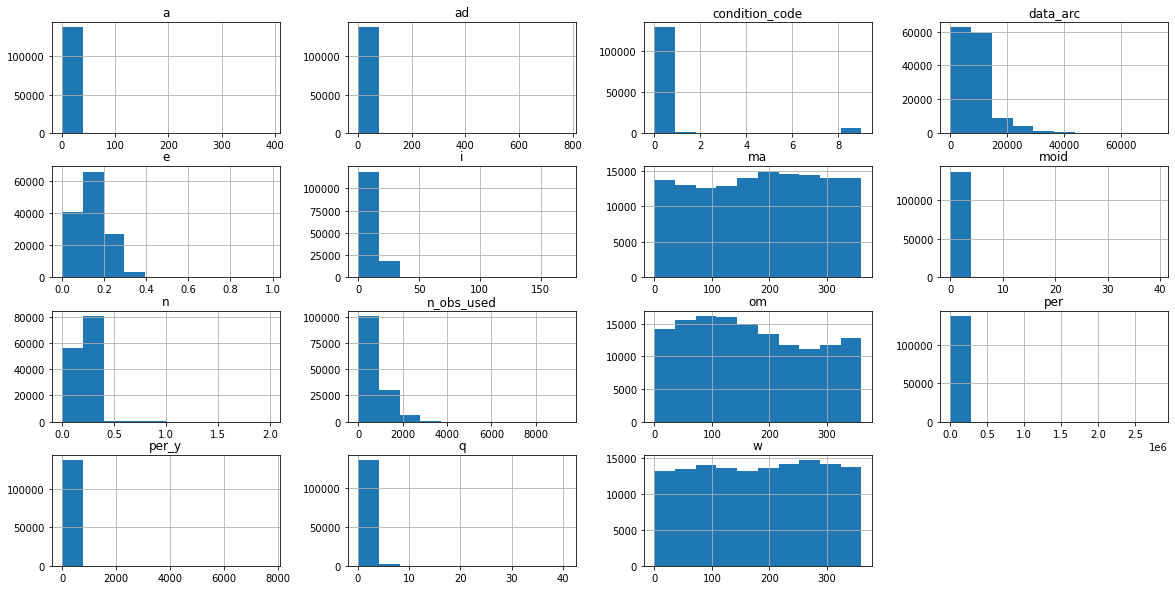

In [62]:
df.hist(figsize=(20,10))
plt.show;

There are some concerns, where the distribution is clustered at one end. However, they could still contribute significantly to the target value. Even though some of them look like there is no variation, many of them have a max that is signifcantly higher than the rest of the records. To get a better look at some of the variables, boxplots can be used.

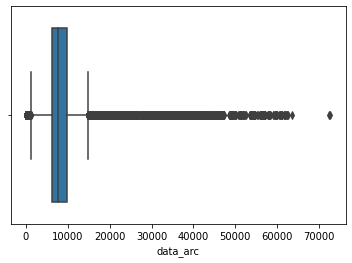

In [64]:
sns.boxplot(df.data_arc)

This helps to show how skewed data_arc is and that median is a better option for filling in the missing values, than mean.

In [67]:
df['data_arc'] = df['data_arc'].fillna(df['data_arc'].median())